In [1]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
from jax.experimental import sparse
%load_ext autoreload
%autoreload 2

In [ ]:
lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 10, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 11
elements_per_cm = 10
regions = [
    (2.0, [20.0], np.array([[[0.0]]]), [20.0]),
    (1.0, [1.0],  np.array([[[0.0]]]),  [0.0]),
    (2.0, [0.0],  np.array([[[0.0]]]),  [0.0]),
    (1.0, [1.0],  np.array([[[0.9]]]), [1.0]),
    (2.0, [1.0],  np.array([[[0.9]]]), [0.0]),
]


dpn_prob = jax_pn.DPN.DPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)
pn_prob  = jax_pn.PN.PN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)
adpn_prob = jax_pn.ADPN.ADPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)

adpn_prob.Solve_Multigroup_System('vacuum',1)

Solving system with shape: (9624, 9624) and 9624 equations.


array([ 5.08597804e-01,  9.81941077e-01,  9.99000748e-01, ...,
       -1.59142836e-05, -2.86387715e-05,  2.30145288e-05], shape=(9624,))

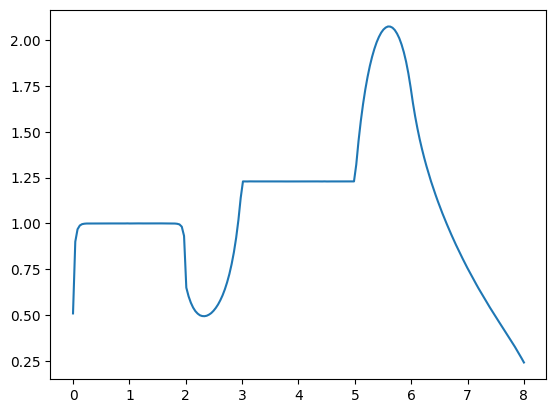

In [11]:
x = np.linspace(0, 8, 200)
u = adpn_prob.interpolate_solution(x, k =0, energy_group=0)

plt.plot(x, u, label='ADPN')